In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

sns.set_palette('husl')

In [3]:
df = pd.read_pickle('data/processed.pickle')
df.head()

,key,title,authors,abstract,year_published,tags,category,skills,skill_cat,types,lang_family
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[approach:fully_automated, data_available:Fals...",[dynamic],[correctness],[correctness_dynamic],"[description, evaluation]",[OOP]
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[approach:semi_automatic, interaction:unknown,...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[skill:readability, approach:fully_automated, ...",[static],"[readability, maintainability]","[maintainability_static, readability_static]",[description],[OOP]
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[approach:semi_automatic, data_available:False...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[Unknown]
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[approach:fully_automated, data_available:Fals...","[dynamic, static]",[correctness],"[correctness_dynamic, correctness_static]","[description, evaluation]",[OOP]


# Meta-Data
### Years Published

In [4]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2020,28
1,2021,27
2,2019,25
3,2018,21
4,2017,20


In [5]:
count_years.no_published.sum()

121

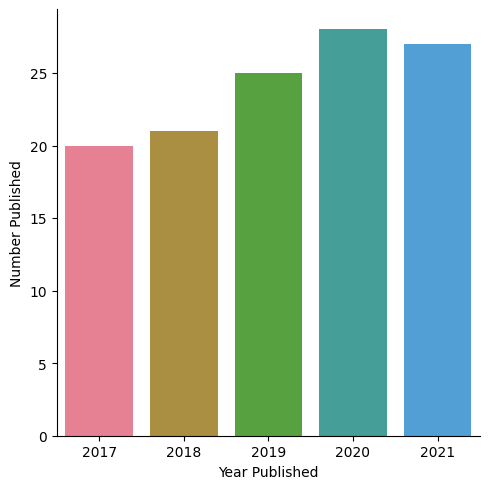

In [6]:
years_plt = sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
years_plt.set(xlabel='Year Published', ylabel='Number Published')
plt.savefig('plots/years_published.pdf')

# List formatter

In [7]:
def list_formatter(items):
    if len(items) == 1:
        return ("Only " + items[0]).title()
    else:
        return (', '.join(items[0:len(items) - 1]) + " and " + items[len(items) - 1]).title()

## Paper Types

In [8]:
paper_types = pd.Series([paper_type for paper_type in df.types]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types['proportion'] = (paper_types.no_type / paper_types.no_type.sum()) * 100
paper_types.paper_type = paper_types.paper_type.apply(lambda pt: list_formatter(pt))
paper_types

,paper_type,no_type,proportion
0,Description And Evaluation,82,67.768595
1,Only Evaluation,17,14.049587
2,Only Description,11,9.090909
3,Only Experience,11,9.090909


In [9]:
paper_types.no_type.sum()

121

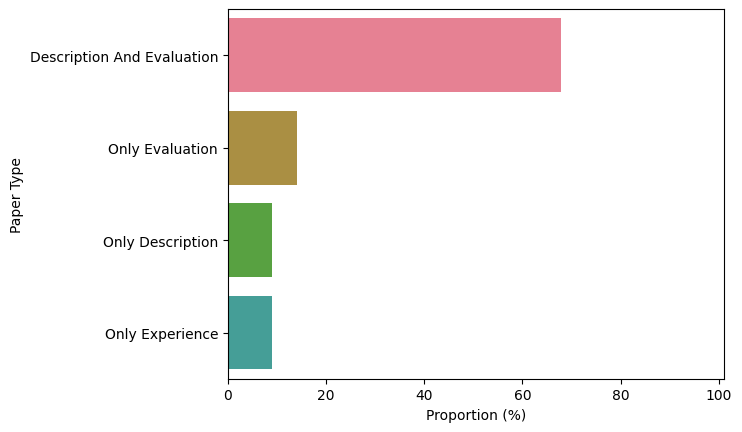

In [10]:
ax_type = sns.barplot(paper_types, y='paper_type', x='proportion')
ax_type.set(xlabel = 'Proportion (%)', ylabel='Paper Type')
plt.xlim([0, 101])
plt.savefig('plots/paper_types.pdf', bbox_inches='tight')

## Degree of Automation

In [11]:
auto = pd.Series([tag.replace('approach:', '') for tags in df.tags for tag in tags if tag.startswith('approach')]).value_counts().reset_index()
auto.columns = ["degree_of_automation", 'number']
auto['proportion'] = (auto.number / auto.number.sum()) * 100
auto.head()

,degree_of_automation,number,proportion
0,fully_automated,99,81.818182
1,semi_automatic,17,14.049587
2,unclear,5,4.132231


In [12]:
auto.number.sum()

121

In [13]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'approach' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[approach:fully_automated]
1,Semiautomatic generation and assessment of Jav...,[approach:semi_automatic]
2,A tool for evaluating computer programs from s...,[approach:fully_automated]
3,Virtual Teaching Assistant for Grading Program...,[approach:semi_automatic]
4,Analysis of an automatic grading system within...,[approach:fully_automated]
...,...,...
116,Automated data-driven hints for computer progr...,[approach:fully_automated]
117,Learning and teaching numerical methods with a...,[approach:fully_automated]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[approach:fully_automated]
119,An AI system for coaching novice programmers,[approach:fully_automated]


In [14]:
auto.degree_of_automation = auto.degree_of_automation.str.replace('_', ' ').str.title()
auto

,degree_of_automation,number,proportion
0,Fully Automated,99,81.818182
1,Semi Automatic,17,14.049587
2,Unclear,5,4.132231


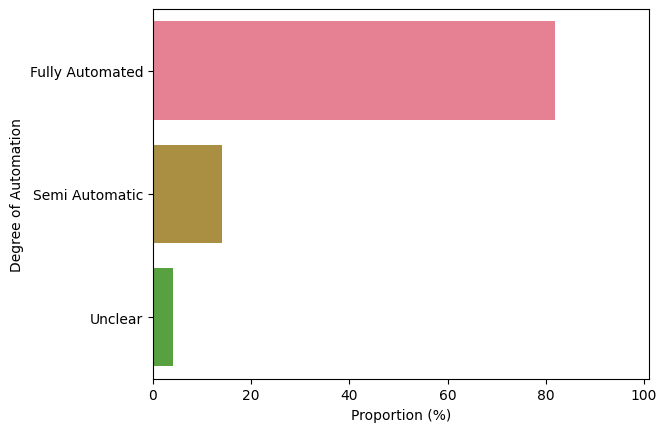

In [15]:
ax_doa = sns.barplot(auto, y='degree_of_automation', x='proportion')
ax_doa.set(xlabel = 'Proportion (%)', ylabel='Degree of Automation')
plt.xlim([0, 101])
plt.savefig('plots/auto_degree.pdf', bbox_inches='tight')

## Interaction type

In [16]:
inter = pd.Series([tag.replace('interaction:', '') for tags in df.tags for tag in tags if tag.startswith('interaction')]).value_counts().reset_index()
inter.columns = ["interaction", 'number']
inter['proportion'] = (inter.number / inter.number.sum()) * 100
inter.head()

,interaction,number,proportion
0,unknown,50,41.322314
1,multiple,50,41.322314
2,single,18,14.876033
3,none,3,2.479339


In [17]:
inter.number.sum()

121

In [18]:
pd.concat([df.title, df.tags.apply(lambda labels: [label for label in labels if 'interaction' in label])], axis=1)

,title,tags
0,An experience of automated assessment in a lar...,[interaction:unknown]
1,Semiautomatic generation and assessment of Jav...,[interaction:unknown]
2,A tool for evaluating computer programs from s...,[interaction:unknown]
3,Virtual Teaching Assistant for Grading Program...,[interaction:multiple]
4,Analysis of an automatic grading system within...,[interaction:unknown]
...,...,...
116,Automated data-driven hints for computer progr...,[interaction:multiple]
117,Learning and teaching numerical methods with a...,[interaction:multiple]
118,Ask-Elle: an Adaptable Programming Tutor for H...,[interaction:multiple]
119,An AI system for coaching novice programmers,[interaction:unknown]


In [19]:
inter.interaction = inter.interaction.str.title()
inter

,interaction,number,proportion
0,Unknown,50,41.322314
1,Multiple,50,41.322314
2,Single,18,14.876033
3,None,3,2.479339


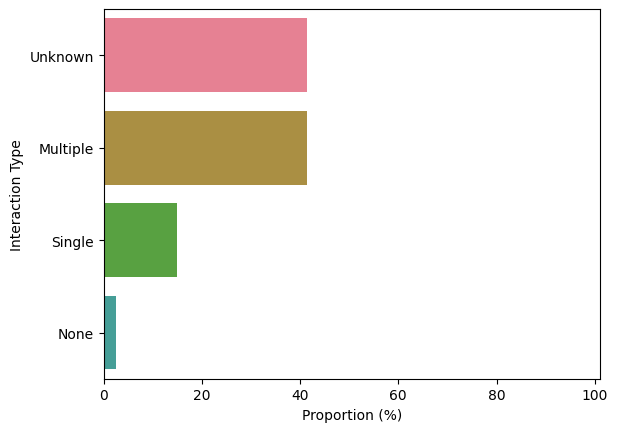

In [20]:
ax_int = sns.barplot(inter, y='interaction', x='proportion')
ax_int.set(xlabel = 'Proportion (%)', ylabel='Interaction Type')
plt.xlim([0, 101])
plt.savefig('plots/interaction.pdf', bbox_inches='tight')

# Skills

In [21]:
skills = pd.Series([skill for skill in df.skills]).value_counts().reset_index()
skills.columns = ["skills", 'number']

skills['proportion'] = (skills.number / skills.number.sum()) * 100
skills.skills = skills.skills.apply(lambda pt: list_formatter(pt))
skills

,skills,number,proportion
0,Only Correctness,80,66.115702
1,Correctness And Readability,19,15.702479
2,"Correctness, Readability And Maintainability",7,5.785124
3,Correctness And Maintainability,5,4.132231
4,Readability And Maintainability,4,3.305785
5,Only Readability,4,3.305785
6,Correctness And Documentation,1,0.826446
7,Only Maintainability,1,0.826446


In [22]:
skills.number.sum()

121

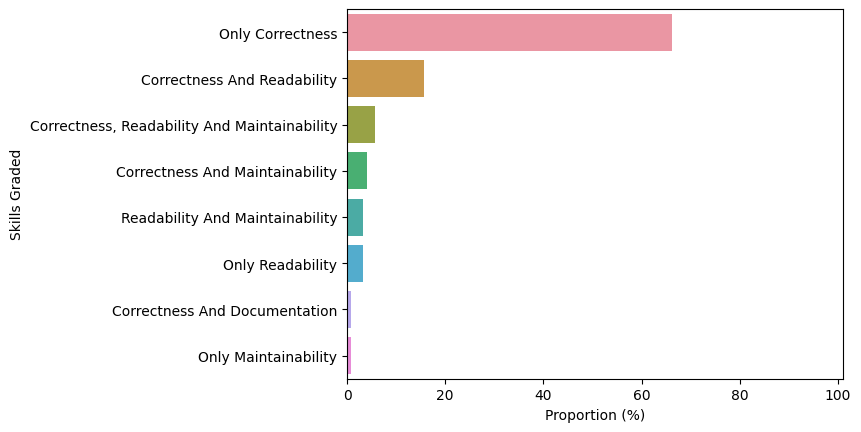

In [23]:
ax_skill = sns.barplot(skills, y='skills', x='proportion')
ax_skill.set(xlabel = 'Proportion (%)', ylabel='Skills Graded')
plt.xlim([0, 101])
plt.savefig('plots/skills.pdf', bbox_inches='tight')

# Skill-Category Complete Mapping
## 1D Plots

In [24]:
def skill_cat_formatter(sk):
    sk = [s.split('_') for s in sk]

    if len(sk) == 1:
        return " using ".join(sk[0]).title()
    elif len(sk) == 2:
        if sk[0][0] == sk[1][0]:
            return (sk[0][0] + ' using ' + sk[0][1] + ' and ' + sk[1][1]).title()
        if sk[0][1] == sk[1][1]:
            return (sk[0][0] + ' and ' + sk[1][0] + ' using ' + sk[0][1]).title()
        else:
            return (" and ".join([' using '.join(s) for s in sk])).title()
    else:
        return sk

In [25]:
skill_cat_count = df.skill_cat.value_counts().reset_index().copy()
skill_cat_count.columns = ["skill_cat", 'number']
skill_cat_count['proportion'] = (skill_cat_count.number / skill_cat_count.number.sum()) * 100
skill_cat_count.skill_cat = skill_cat_count.skill_cat.apply(lambda sk: skill_cat_formatter(sk))
skill_cat_count.skill_cat = skill_cat_count.skill_cat.str.replace('Ml', 'ML')
skill_cat_count

,skill_cat,number,proportion
0,Correctness Using Dynamic,40,33.057851
1,Correctness Using Dynamic And Static,21,17.355372
2,Correctness Using Static,17,14.049587
3,Correctness Using Dynamic And Readability Usin...,15,12.396694
4,Maintainability And Readability Using Static,4,3.305785
5,Readability Using Static,4,3.305785
6,Correctness Using Dynamic And Maintainability ...,3,2.479339
7,Correctness Using ML And Static,3,2.479339
8,Correctness And Maintainability Using Static,2,1.652893
9,Correctness And Readability Using Static,2,1.652893


In [26]:
skill_cat_count.number.sum()

121

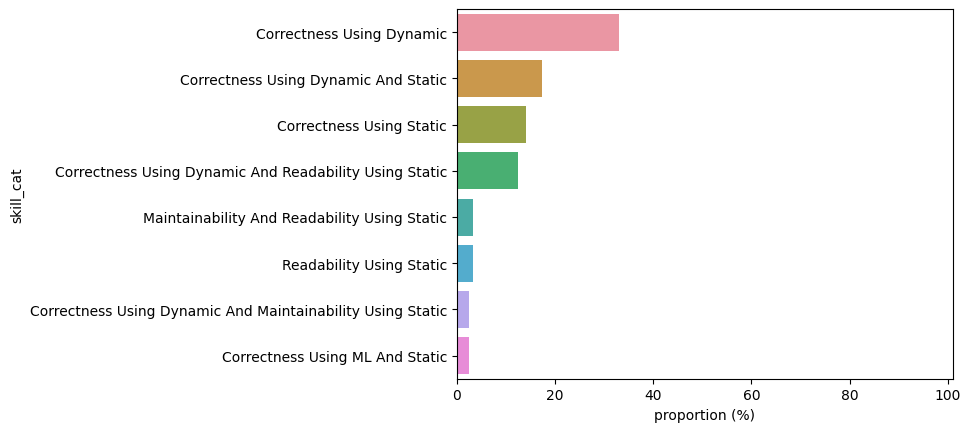

In [27]:
ax_skill_cat = sns.barplot(skill_cat_count[skill_cat_count.number > 2], y='skill_cat', x='proportion')
ax_skill_cat.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/skill_cat.pdf', bbox_inches='tight')

In [28]:
skill_cat_exp = df.explode('skill_cat').skill_cat.value_counts().reset_index()
skill_cat_exp.columns = ["skill_cat", 'number']
skill_cat_exp['proportion'] = (skill_cat_exp.number / skill_cat_exp.number.sum()) * 100
skill_cat_exp.skill_cat = skill_cat_exp.skill_cat.str.replace('_', ' ').str.title()
skill_cat_exp.head()

,skill_cat,number,proportion
0,Correctness Dynamic,82,45.555556
1,Correctness Static,47,26.111111
2,Readability Static,28,15.555556
3,Maintainability Static,11,6.111111
4,Correctness Ml,8,4.444444


In [29]:
skill_cat_exp.number.sum()

180

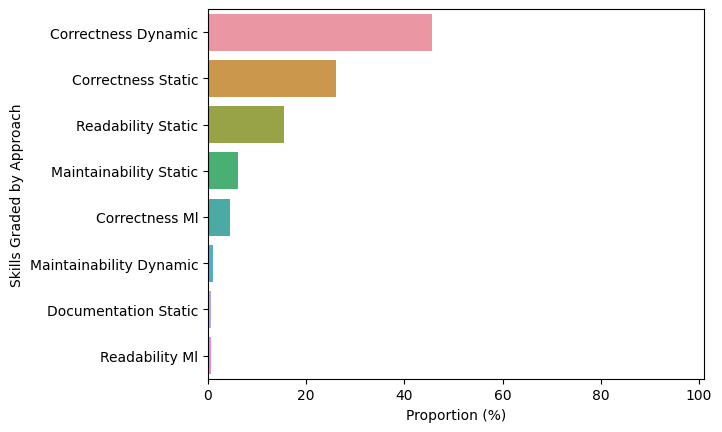

In [30]:
ax_skill_cat_exp = sns.barplot(skill_cat_exp, y='skill_cat', x='proportion')
ax_skill_cat_exp.set(xlabel = 'Proportion (%)', ylabel='Skills Graded by Approach')
plt.xlim([0, 101])
plt.savefig('plots/skill_cat_exp.pdf', bbox_inches='tight')

## Skill Category 2D plots

In [31]:
skill_cat_2d = df[['title', 'skill_cat']].explode('skill_cat').copy()
skill_cat_2d.head()

,title,skill_cat
0,An experience of automated assessment in a lar...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_dynamic
1,Semiautomatic generation and assessment of Jav...,correctness_static
2,A tool for evaluating computer programs from s...,maintainability_static
2,A tool for evaluating computer programs from s...,readability_static


In [32]:
split_df = skill_cat_2d.skill_cat.str.split('_', expand=True)
skill_cat_2d_split = pd.concat([skill_cat_2d, split_df],axis=1).drop(columns='skill_cat')
skill_cat_2d_split.columns = ['title', 'skill', 'category']
skill_cat_2d_split.head()

,title,skill,category
0,An experience of automated assessment in a lar...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,dynamic
1,Semiautomatic generation and assessment of Jav...,correctness,static
2,A tool for evaluating computer programs from s...,maintainability,static
2,A tool for evaluating computer programs from s...,readability,static


In [63]:
skill_cat_2d_grp = skill_cat_2d_split.groupby(['skill', 'category']).count().reset_index()
skill_cat_2d_grp.columns = ['skill', 'category', 'number']
skill_cat_2d_grp = skill_cat_2d_grp.sort_values('number', ascending=False)
skill_cat_2d_grp.head()
skill_cat_2d_grp.to_csv('data/skill_cat.csv')

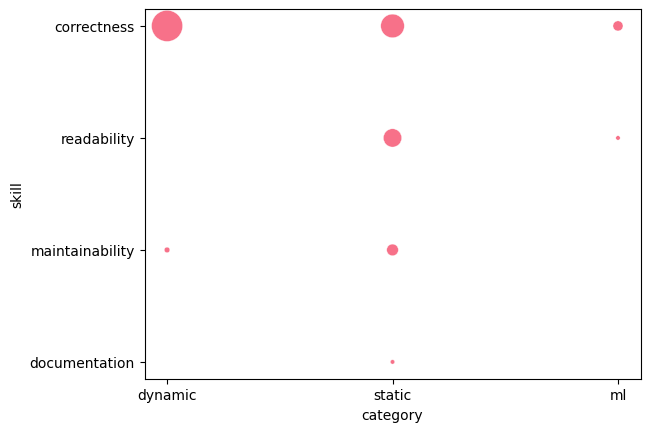

In [34]:
sns.scatterplot(skill_cat_2d_grp, y='skill', x='category', size='number', sizes=(10, 500), legend=False)
plt.savefig('plots/skill_cat_2d_bubble.pdf', bbox_inches='tight')

### Bipartie

In [35]:
skill_cat_bp = skill_cat_2d_grp.copy()

skill_cat_bp.skill = skill_cat_bp.skill.map(lambda x: x[:4])
skill_cat_bp.category = skill_cat_bp.category.map(lambda x: x[:4])

skill_cat_bp['proportion'] = (skill_cat_bp.number / skill_cat_bp.number.sum()) * 50

skill_cat_bp

,skill,category,number,proportion
0,corr,dyna,82,22.777778
2,corr,stat,47,13.055556
7,read,stat,28,7.777778
5,main,stat,11,3.055556
1,corr,ml,8,2.222222
4,main,dyna,2,0.555556
3,docu,stat,1,0.277778
6,read,ml,1,0.277778


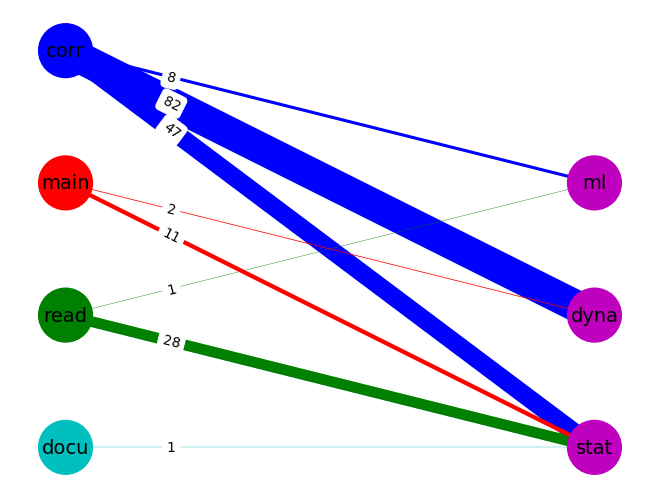

In [36]:
# Adapted from documentation
color_map_skill = {'corr':'b', 'read':'g', 'main':'r', 'docu':'c'}


B = nx.Graph()
B.add_nodes_from(['corr', 'read', 'main', 'docu'], bipartite=0)
B.add_nodes_from(['dyna', 'stat', 'ml'], bipartite=1)

bp_raw = list(skill_cat_bp.itertuples(index=False,name=None))

for e in bp_raw:
    B.add_edge(e[0], e[1], count=e[2], width=e[3], color=color_map_skill[e[0]])


# Separate by group
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

nodes = B.nodes()
node_colors = [color_map_skill[n] if n in color_map_skill else 'm' for n in nodes]

edges = B.edges()
edge_colors = [B[u][v]['color'] for u, v in edges]
weights = [B[u][v]['width'] for u, v in edges]

nx.draw(B, pos, edge_color=edge_colors, width=weights, node_size=1500, node_color=node_colors)

# node labels
nx.draw_networkx_labels(B, pos, font_size=14, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(B, "count")

nx.draw_networkx_edge_labels(B, pos, edge_labels, label_pos=0.8)
plt.savefig('plots/skill_cat_bipartie.png')

## Skill Category Over Time
### Skill Category Combined

In [37]:
skill_cat_time = df[['skill_cat', 'year_published']].copy()
skill_cat_time = skill_cat_time.explode('skill_cat')
skill_cat_time.head()

,skill_cat,year_published
0,correctness_dynamic,2021
1,correctness_dynamic,2021
1,correctness_static,2021
2,maintainability_static,2021
2,readability_static,2021


In [38]:
skill_cat_time_grp = skill_cat_time.copy()
skill_cat_time_grp.skill_cat = skill_cat_time_grp.skill_cat.str.replace('_', ' ').str.title()
skill_cat_time_grp.year_published = skill_cat_time_grp.year_published.astype(str)
skill_cat_time_grp['cumulative_sum'] = 0
skill_cat_time_grp = skill_cat_time_grp.groupby(['skill_cat', 'year_published']).count().groupby(level=0).cumsum().reset_index()

skill_cat_time_grp.head()

,skill_cat,year_published,cumulative_sum
0,Correctness Dynamic,2017,10
1,Correctness Dynamic,2018,24
2,Correctness Dynamic,2019,38
3,Correctness Dynamic,2020,63
4,Correctness Dynamic,2021,82


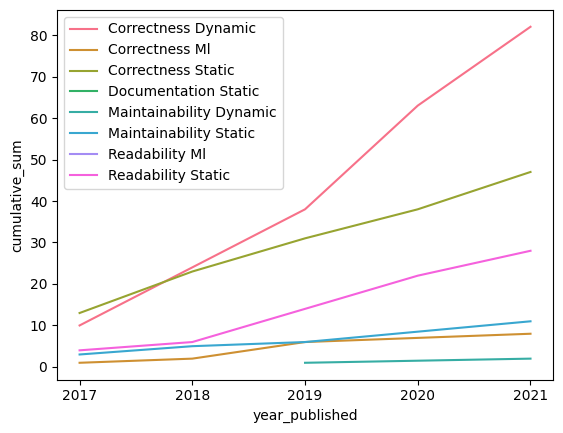

In [39]:
sns.lineplot(skill_cat_time_grp, x='year_published', y='cumulative_sum', hue='skill_cat')
plt.legend(loc='upper left')
plt.savefig('plots/skill_cat_time.pdf')

### Skill Category Split

In [40]:
skill_cat_time_s = df[['skill_cat', 'year_published']].copy()
skill_cat_time_s = skill_cat_time_s.explode('skill_cat')
split = skill_cat_time_s.skill_cat.str.split('_', expand=True)
skill_cat_time_s = pd.concat([skill_cat_time_s, split], axis=1)
skill_cat_time_s = skill_cat_time_s.drop(columns='skill_cat')
skill_cat_time_s.columns = ['year_published', 'skill', 'category']
skill_cat_time_s.head()

,year_published,skill,category
0,2021,correctness,dynamic
1,2021,correctness,dynamic
1,2021,correctness,static
2,2021,maintainability,static
2,2021,readability,static


In [41]:
skill_cat_time_s['total'] = 0
skill_cat_s_g = skill_cat_time_s.groupby(['year_published', 'skill', 'category']).count().reset_index().sort_values(['skill', 'category'])
skill_cat_s_g.category = skill_cat_s_g.category.replace('ml', 'machine learning')
skill_cat_s_g

,year_published,skill,category,total
0,2017,correctness,dynamic,10
6,2018,correctness,dynamic,14
11,2019,correctness,dynamic,14
18,2020,correctness,dynamic,25
22,2021,correctness,dynamic,19
1,2017,correctness,machine learning,1
7,2018,correctness,machine learning,1
12,2019,correctness,machine learning,4
19,2020,correctness,machine learning,1
23,2021,correctness,machine learning,1


In [42]:
color_map_year = {2017:'b', 2018:'g', 2019:'r', 2020:'c', 2021:'m'}
MARKER_SCALE = 10

def plot_years(sub_ax, skill, cat):

    temp_df = skill_cat_s_g[skill_cat_s_g.skill == skill]
    temp_df = temp_df[temp_df.category == cat]

    for index, row in temp_df.iterrows():
        x = [row.year_published for i in range(row.total)]
        y = [1 for i in range(row.total)]

        sub_ax.scatter(x, y, c=color_map_year[row.year_published], label=row.year_published, s=(row.total * MARKER_SCALE))
        sub_ax.set(xlim=[2016, 2022])



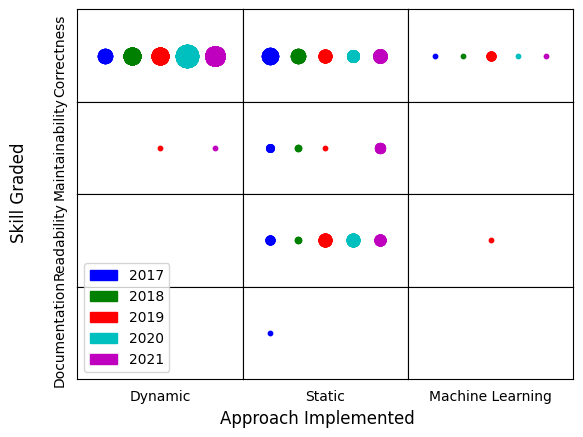

In [43]:

import numpy as np
import matplotlib.patches as mpatches

fig = plt.figure()
grid = fig.add_gridspec(4, 3, wspace=0, hspace=0)

axs = grid.subplots()

skills = ['correctness', 'maintainability', 'readability', 'documentation']
category = ['dynamic', 'static', 'machine learning']

for (s, c), ax in np.ndenumerate(axs):
    plot_years(ax, skills[s], category[c])
    ax.set(xticks=[], yticks=[], xlabel=category[c].title())

    if c == 0:
        ax.set(ylabel=skills[s].title())

    if c == 0 and s == 3:
        patches = [mpatches.Patch(color=color, label=year) for year, color in color_map_year.items()]
        ax.legend(handles=patches, loc='lower left')

fig.supxlabel('Approach Implemented')
fig.supylabel('Skill Graded')
plt.savefig('plots/skill_cat_time_sep.pdf')

# Grading/Feedback Techniques

In [44]:
tech_df = pd.Series([tag.replace('technique:', '') for tags in df.tags for tag in tags if tag.startswith('technique')]).value_counts().reset_index()
tech_df.columns = ["technique", 'number']
tech_df['proportion'] = (tech_df.number / tech_df.number.sum()) * 100
tech_df

,technique,number,proportion
0,unit_testing,81,26.470588
1,static_analysis,30,9.803922
2,pattern_matching,23,7.516340
3,model_solution_req,22,7.189542
4,matching_rules,22,7.189542
5,style_check,17,5.555556
6,program_repair,12,3.921569
7,model_solution_closeness,11,3.594771
8,machine_learning,10,3.267974
9,code_repair_for_feedback,8,2.614379


In [45]:
def add_cats(tech):
    if tech in ['unit_testing', 'property_based_testing', 'ci', 'output_matching']:
        return 'dynamic'
    if tech in ['pattern_matching', 'static_analysis', 'code_metrics', 'cluster',
                'style_check', 'program_repair', 'rule_based', 'dsl_rules', 'model_solution_req',
                'model_solution_closeness', 'code_repair_for_feedback']:
        return 'static'
    if tech in ['machine_learning', 'misc']:
        return 'other'

In [46]:
tech_df['category'] = tech_df.technique.apply(lambda tech: add_cats(tech))
tech_df

,technique,number,proportion,category
0,unit_testing,81,26.470588,dynamic
1,static_analysis,30,9.803922,static
2,pattern_matching,23,7.516340,static
3,model_solution_req,22,7.189542,static
4,matching_rules,22,7.189542,None
5,style_check,17,5.555556,static
6,program_repair,12,3.921569,static
7,model_solution_closeness,11,3.594771,static
8,machine_learning,10,3.267974,other
9,code_repair_for_feedback,8,2.614379,static


In [47]:
tech_df.category.isna().sum()

28

In [48]:
tech_df[tech_df.category.isna()]

,technique,number,proportion,category
4,matching_rules,22,7.189542,None
10,ci_cd,7,2.287582,None
13,pre_defined_questions,5,1.633987,None
14,trace_examination,5,1.633987,None
15,dynamic_analysis,4,1.307190,None
16,language_stuctures,3,0.980392,None
17,mutation_testing,3,0.980392,None
19,clustering,3,0.980392,None
20,graph_analysis,2,0.653595,None
21,test_case_generation,2,0.653595,None


In [49]:
tech_df = tech_df.sort_values(by=['category', 'proportion'], ascending=[False, True])
tech_df.technique = tech_df.technique.str.replace('_', ' ').str.title()
tech_df.head()

,technique,number,proportion,category
12,Code Metrics,7,2.287582,static
9,Code Repair For Feedback,8,2.614379,static
7,Model Solution Closeness,11,3.594771,static
6,Program Repair,12,3.921569,static
5,Style Check,17,5.555556,static


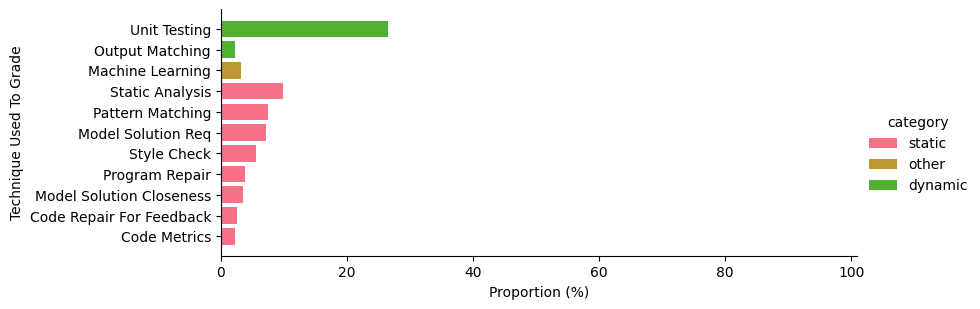

In [50]:
ax_tech_cat = sns.FacetGrid(tech_df[tech_df.number > 5], hue='category', aspect=3)
ax_tech_cat.map_dataframe(plt.barh, y='technique', width='proportion')

ax_tech_cat.set(xlim=[0, 101], xlabel='Proportion (%)', ylabel='Technique Used To Grade')
ax_tech_cat.add_legend()
plt.savefig('plots/technique_cat.pdf')

# Language

In [51]:
families = pd.Series([family for family in df.lang_family]).value_counts().reset_index()
families.columns = ["language_family", 'number']
families['proportion'] = (families.number / families.number.sum()) * 100
families.language_family = families.language_family.apply(lambda fl: list_formatter(fl))
families.language_family = families.language_family.str.replace('Oop', 'OOP')
families

,language_family,number,proportion
0,Only OOP,83,68.595041
1,Only Unknown,9,7.438017
2,Only Functional,8,6.611570
3,Only Agnostic,5,4.132231
4,Only Low-Level,3,2.479339
5,Only Graphics,2,1.652893
6,OOP And Graphics,2,1.652893
7,OOP And Functional,2,1.652893
8,OOP And Agnostic,2,1.652893
9,Only Web,2,1.652893


In [52]:
families.number.sum()

121

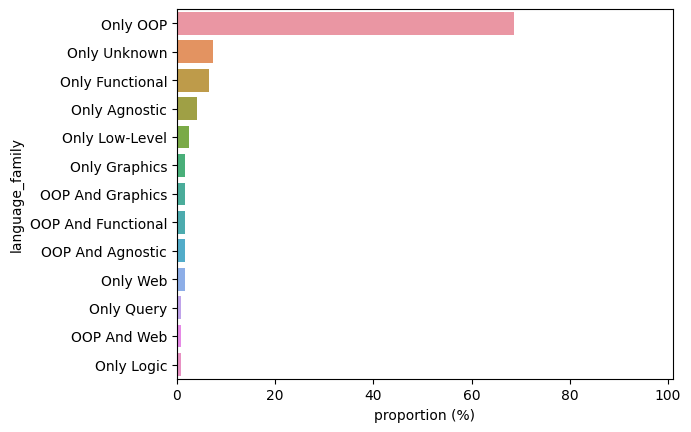

In [53]:
ax_lang = sns.barplot(families, y='language_family', x='proportion')
ax_lang.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/lang_family.pdf', bbox_inches='tight')

In [54]:
evaluation  = pd.Series([tag.replace('evaluation:', '') for tags in df.tags for tag in tags if tag.startswith('evaluation')]).value_counts().reset_index()
evaluation.columns = ["evaluation", 'number']
evaluation['proportion'] = (evaluation.number / evaluation.number.sum()) * 100
evaluation.evaluation = evaluation.evaluation.str.replace('_', ' ').str.title()
evaluation

,evaluation,number,proportion
0,Student Survey,38,23.456790
1,Manual Grading,36,22.222222
2,Analytics,20,12.345679
3,Auto Grading,15,9.259259
4,None,11,6.790123
5,User Study,6,3.703704
6,Grading Accuracy,6,3.703704
7,Teacher Survey,6,3.703704
8,Compared To Other Tools,5,3.086420
9,Anecdotal,5,3.086420


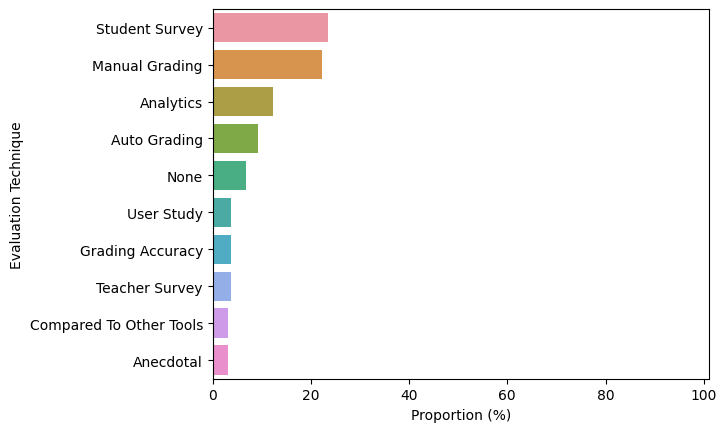

In [55]:
## TRUNCATED UNDER 5 RESULTS
ax_eval = sns.barplot(evaluation[evaluation['number'] > 4], y='evaluation', x='proportion')
ax_eval.set(xlabel = 'Proportion (%)', ylabel='Evaluation Technique')
plt.xlim([0, 101])
plt.savefig('plots/evaluation.pdf', bbox_inches='tight')

In [56]:
families = pd.Series([family for family in df.lang_family]).value_counts().reset_index()
families.columns = ["language_family", 'number']
families['proportion'] = (families.number / families.number.sum()) * 100
families.language_family = families.language_family.astype(str)
families

,language_family,number,proportion
0,['OOP'],83,68.595041
1,['Unknown'],9,7.438017
2,['Functional'],8,6.611570
3,['Agnostic'],5,4.132231
4,['Low-Level'],3,2.479339
5,['Graphics'],2,1.652893
6,"['OOP', 'Graphics']",2,1.652893
7,"['OOP', 'Functional']",2,1.652893
8,"['OOP', 'Agnostic']",2,1.652893
9,['Web'],2,1.652893


In [57]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability.data_available = data_availability.data_available.str.replace('_', ' ').str.title()
data_availability

,data_available,number,proportion
0,False,102,84.297521
1,True,10,8.264463
2,On Request,9,7.438017


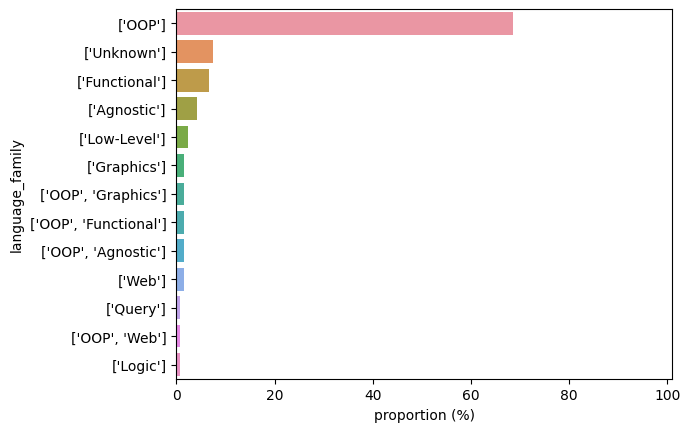

In [58]:
ax_lang = sns.barplot(families, y='language_family', x='proportion')
ax_lang.set(xlabel = 'proportion (%)')
plt.xlim([0, 101])
plt.savefig('plots/lang_family.pdf', bbox_inches='tight')

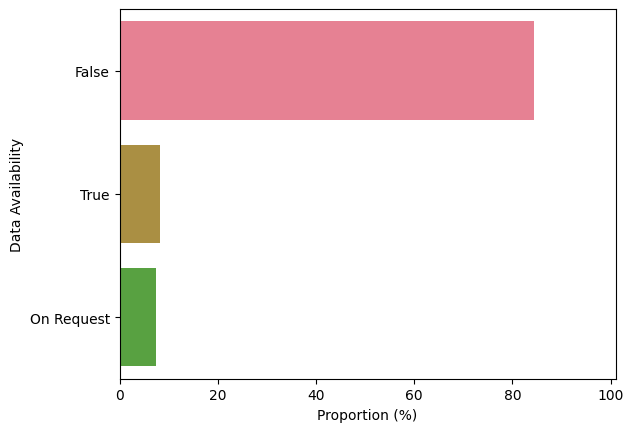

In [59]:
ax_da = sns.barplot(data_availability, y='data_available', x='proportion')
plt.xlim([0, 101])
ax_da.set(xlabel = 'Proportion (%)', ylabel='Data Availability')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')

## Data Availiablity

In [60]:
data_availability  = pd.Series([tag.replace('data_available:', '') for tags in df.tags for tag in tags if tag.startswith('data_available')]).value_counts().reset_index()
data_availability.columns = ["data_available", 'number']
data_availability['proportion'] = (data_availability.number / data_availability.number.sum()) * 100
data_availability

,data_available,number,proportion
0,False,102,84.297521
1,True,10,8.264463
2,on_request,9,7.438017


In [61]:
data_availability.number.sum()

121

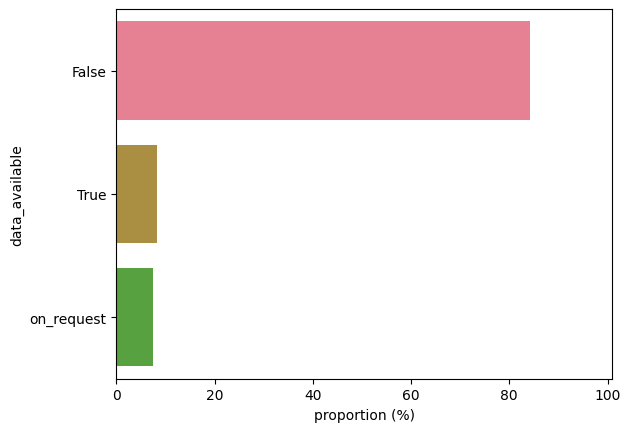

In [62]:
ax_da = sns.barplot(data_availability, y='data_available', x='proportion')
plt.xlim([0, 101])
ax_da.set(xlabel = 'proportion (%)')
plt.savefig('plots/data_availability.pdf', bbox_inches='tight')